# 作業

使⽤ SIFT 來抽取特徵

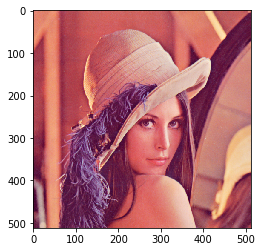

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
IMG_PATH = "Part01/lena.png"

img = cv2.imread(IMG_PATH,cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

keypoints_grey #=1098


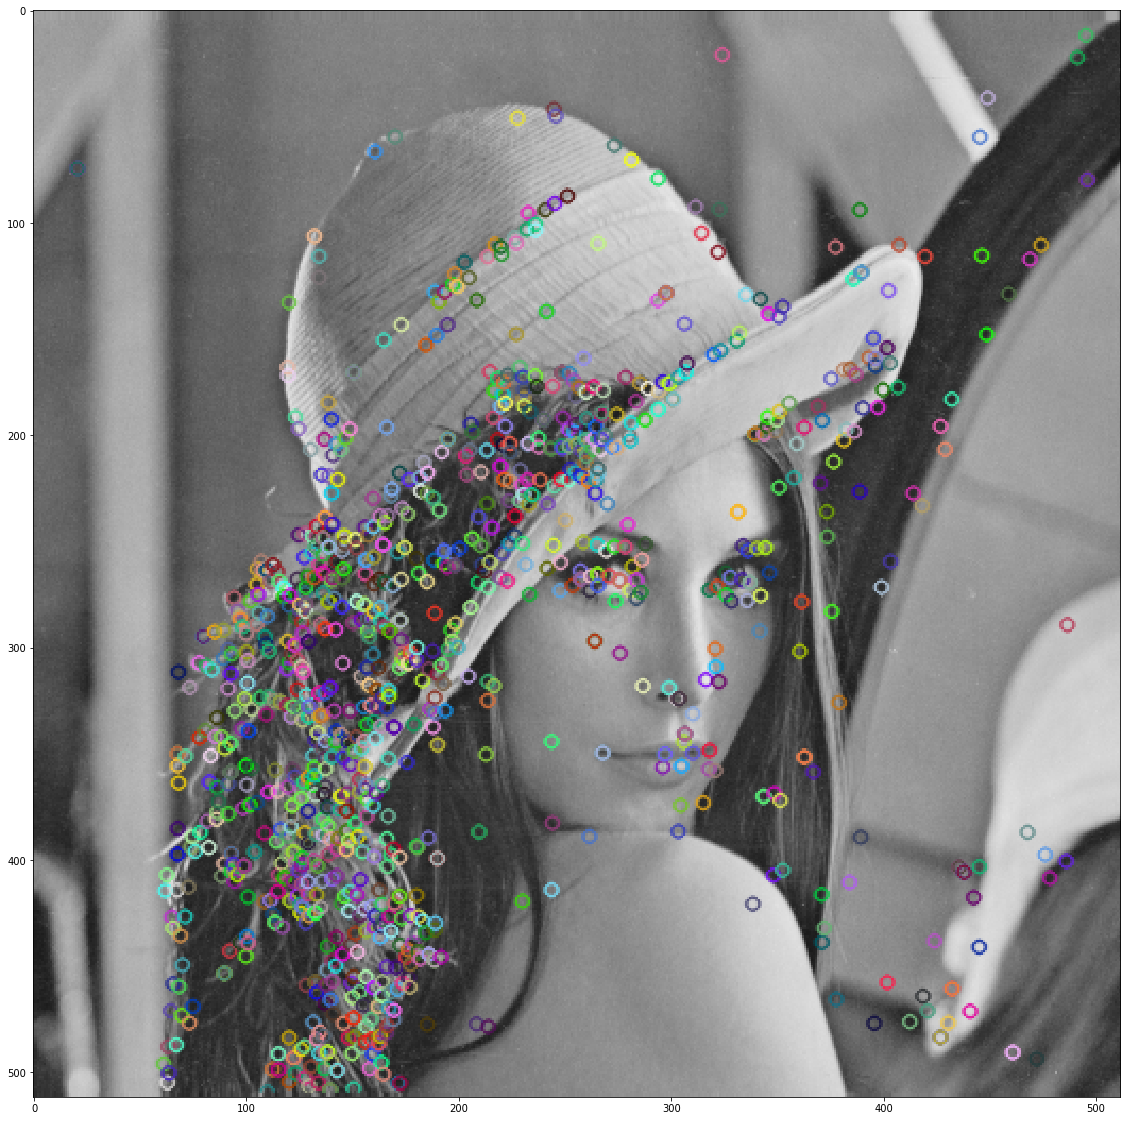

In [18]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift =  cv2.xfeatures2d.SIFT_create() # 建立 SIFT 物件
keypoints_grey = sift.detect(img_gray,None) # 抽取關鍵點
img_show = cv2.drawKeypoints(img_gray, keypoints_grey,np.array([]))
print("keypoints_grey #={}".format(len(keypoints_grey)))
figure = plt.figure(2, figsize=(20,20))
ax = figure.add_subplot(111)
ax.imshow(img_show)

keypoints_color #=1098


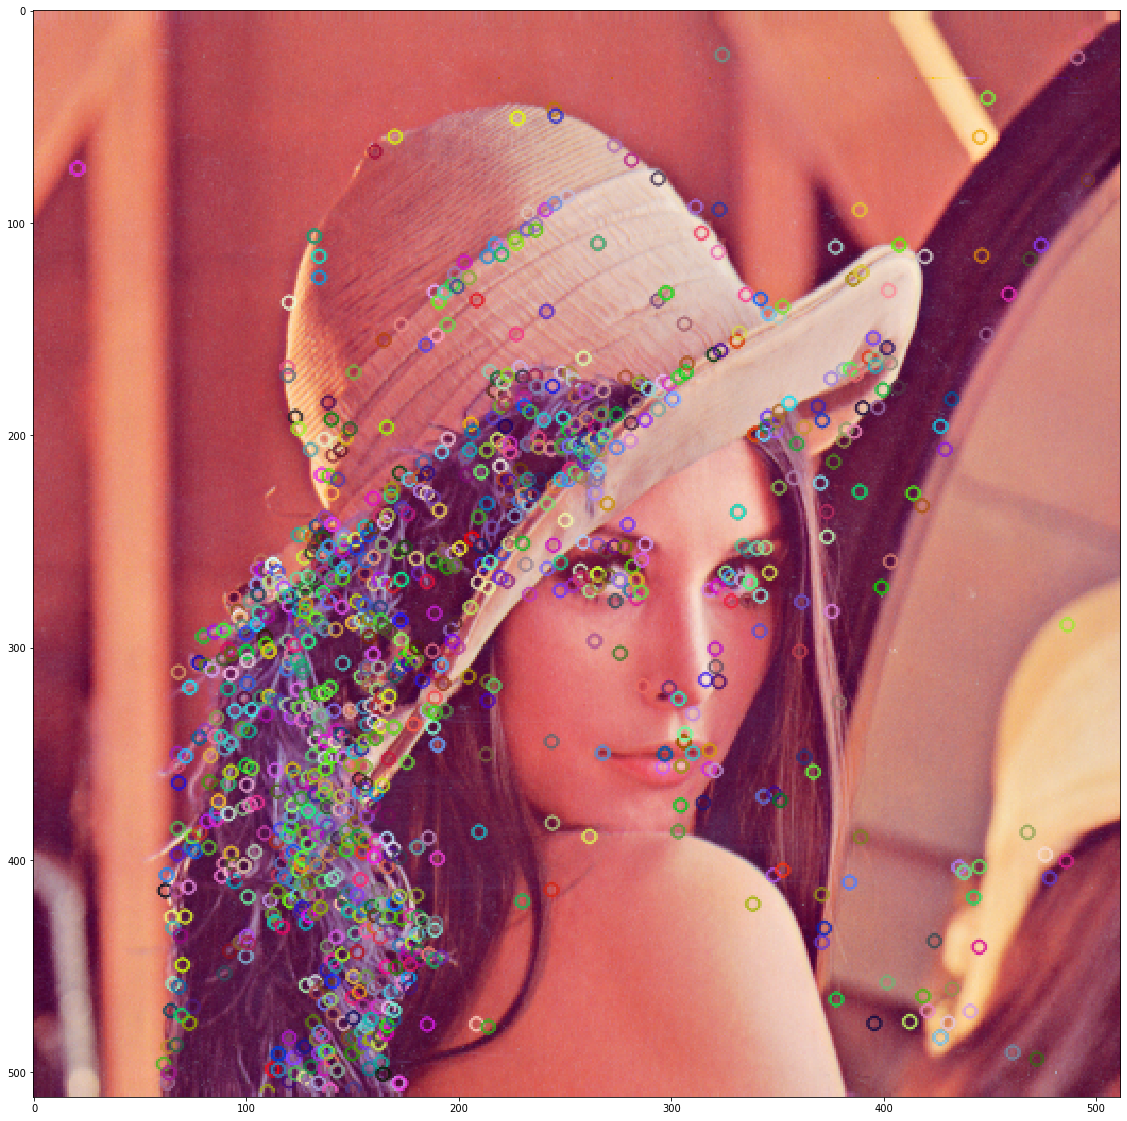

In [19]:

keypoints_color = sift.detect(img,None) # 抽取關鍵點
img_show = cv2.drawKeypoints(img, keypoints_color,np.array([]))
print("keypoints_color #={}".format(len(keypoints_color)))
figure = plt.figure(2, figsize=(20,20))
ax = figure.add_subplot(111)
ax.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))

In [13]:
import pandas as pd 
df=pd.DataFrame( {"x_grey":[kp.pt[0] for kp in keypoints_grey], "y_grey":[kp.pt[1] for kp in keypoints_grey], 
                  "x_color":[kp.pt[0] for kp in keypoints_color],"y_color":[kp.pt[1] for kp in keypoints_color] } )
df["dist"] = np.sqrt ((df["x_grey"]-df["x_color"])**2 + (df["y_grey"]-df["y_color"])**2)
df

,x_grey,y_grey,x_color,y_color,dist
0,20.486700,74.566391,20.486700,74.566391,0.0
1,20.486700,74.566391,20.486700,74.566391,0.0
2,61.064941,496.000580,61.064941,496.000580,0.0
3,61.792973,414.456207,61.792973,414.456207,0.0
4,62.505665,407.091949,62.505665,407.091949,0.0
...,...,...,...,...,...
1093,486.299164,289.340149,486.299164,289.340149,0.0
1094,491.037415,22.467991,491.037415,22.467991,0.0
1095,495.121246,11.863592,495.121246,11.863592,0.0
1096,495.809296,79.961159,495.809296,79.961159,0.0


not match count=x_grey     0
y_grey     0
x_color    0
y_color    0
same       0
dtype: int64


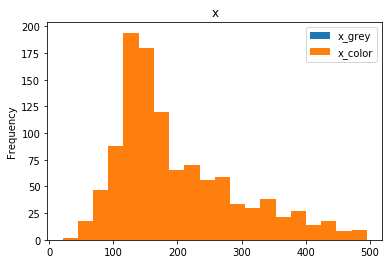

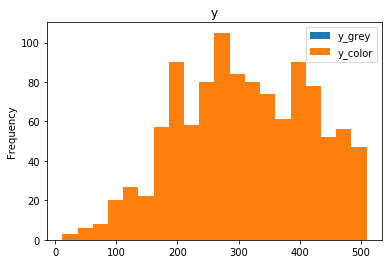

In [66]:
print("not match count={}".format(df[df["same"]==0].count()))
df[["x_grey", "x_color"]].plot.hist(bins=20, title="x")
df[["y_grey", "y_color"]].plot.hist(bins=20, title="y")